<a href="https://www.kaggle.com/code/hanpat99/aviation-business-customer-reviews-webscraping?scriptVersionId=163181898" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Webscraping Civil Aviation reviews data



### The 'Why' of this project?
- I'm scraping this site to understand customer experience for British Airways. 
- I'll use various NLP techniques and LLM prompting to understand some issues plaguing the aviation sector.

Latest dataset uploaded to [Kaggle.](https://www.kaggle.com/datasets/hanpat99/british-airways-customer-reviews-jan-2024/data?select=british_airways_reviews.v4.csv)

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pprint
import re

In [2]:
url_base = 'https://www.airlinequality.com/airline-reviews/british-airways'

In [3]:
'''
Page numbers = 14
'''
page_size = 100
total_pages = 14
url_base = "https://www.airlinequality.com/airline-reviews/british-airways"
page_query = f'/?sortby=post_date%3ADesc&pagesize={page_size}'

reviews = []
review_titles = []
published_dates = []
user_name = []
user_location = []
user_ratings = []
trip_details = []
recommended_by_user =[]
overall_user_rating = []

for page in range(total_pages):
    print(f'Scraping page {page+1}...')
    if page == 0:
        url = url_base + page_query
    else:
        i = page
        page_nums = f'/page/{i}'
        url = url_base + page_nums + page_query

    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html')
    

    for review_title in soup.find_all('h2',{'class':"text_header"}): 
        review_title = review_title.get_text()
        #review_title = re.sub(r'"','',review_title)
        review_titles.append(review_title)

    for review_text in soup.find_all('div',{'class':"text_content"}):
        review_text = review_text.get_text()
        review_text = re.split('[|]',review_text)[1]
        reviews.append(review_text)
        #print(review_text)
        
    for rating in soup.find_all('div', {'itemprop':"reviewRating", 'itemscope':"", 'itemtype':"http://schema.org/Rating", 'class':"rating-10"}): 
        rating = rating.get_text()
        #review_title = re.sub(r'"','',review_title)
        rating = int(re.sub(r'\n','',re.split('/',rating)[0]))
        user_ratings.append(rating)
        #print(user_ratings)
        
    for published_date in soup.find_all('h3',{'class':"text_sub_header userStatusWrapper"}):
        published_date = published_date.get_text()
        #print(published_date)
        u_name = re.sub(r'\n\n','',re.split('[(]', published_date)[0])
        u_loc = re.split( '[)]',(re.split('[(]', published_date)[1]))[0]
        
        published_date = re.split('[)]', published_date)[1]
        published_dates.append(published_date)
        user_name.append(u_name)
        user_location.append(u_loc)
        
        
    for table in  soup.find_all('div',{'class':"review-stats"}):
        table_txt = table.get_text()  
        
        pattern = '\n\n'
        pattern2 = 'Recommended'
        splits = re.split(pattern, table_txt)
        
        trip_data = splits[1]
        recommended = re.split(pattern2,splits[-1])[1]
        recommended = re.sub(' \n','', recommended)[0]
        trip_details.append(trip_data)
        recommended_by_user.append(recommended)
        

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...


In [4]:
df = pd.DataFrame()

df['title'] = pd.Series(review_titles)
df['reviews'] = pd.Series(reviews)

df['published_dates'] = pd.Series(published_dates)

df['user_name'] = pd.Series(user_name)
df['user_location'] = pd.Series(user_location)
df['user_ratings'] = pd.Series(user_ratings)
df['trip_details'] = pd.Series(trip_details)
df['would_recommed_to_others'] = pd.Series(recommended_by_user)


df = df.drop_duplicates()
df.head()

,title,reviews,published_dates,user_name,user_location,user_ratings,trip_details,would_recommed_to_others
0,"""Never again""",We have flown BA five times from western USA...,17th February 2024,Kevin Statham,United States,3,AircraftA350\nType Of TravellerCouple Leisure\...,n
1,"""Is this how low BA has fallen?""",London Heathrow to Istanbul at the start of ...,17th February 2024,C Horton,United Kingdom,3,AircraftA320\nType Of TravellerSolo Leisure\nS...,n
2,“It was a terrible experience”,"Jan 30th, I booked a last-minute, transatlant...",16th February 2024,Anthony C Gallagher,United States,2,AircraftBoeing 777\nType Of TravellerSolo Leis...,n
3,"""all needs a serious rework""",I am a British Airways Gold Guest List member...,11th February 2024,S Jackson,United States,5,AircraftA380\nType Of TravellerSolo Leisure\nS...,n
4,"""flights they have not actually provided""",Another case of reviewing British Airways fl...,8th February 2024,Michael Gardiner,United Kingdom,1,Type Of TravellerCouple Leisure\nSeat TypeEcon...,n


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 0 to 1399
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1300 non-null   object
 1   reviews                   1300 non-null   object
 2   published_dates           1300 non-null   object
 3   user_name                 1300 non-null   object
 4   user_location             1300 non-null   object
 5   user_ratings              1300 non-null   int64 
 6   trip_details              1300 non-null   object
 7   would_recommed_to_others  1300 non-null   object
dtypes: int64(1), object(7)
memory usage: 91.4+ KB


In [6]:
df.would_recommed_to_others.value_counts()

would_recommed_to_others
n    868
y    432
Name: count, dtype: int64

<Axes: >

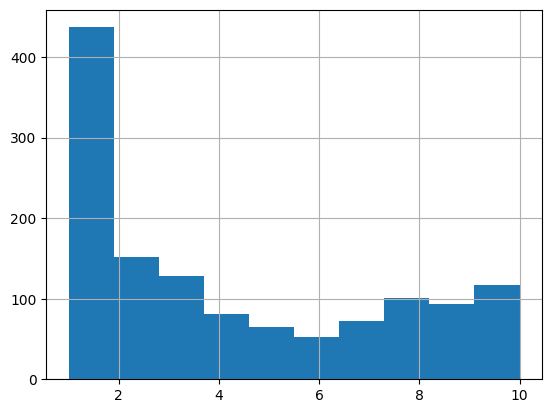

In [7]:
df.user_ratings.hist()

In [8]:
df.to_csv('british_airways_reviews.csv')